In [1]:
# Scikit-Learn

#  간단한 머신러닝 모델을 생성할 수 있는 classic machine learning
#  하드웨어가 크게 작용하지 않아서 저렴하게 만들 수 있다.

#   오래되었다 -> 충분히 예측 가능한 결과를 만들 수 있다.
#   필요하다면, Deep Learning과 함께 쓰는게 좋다.

#   scikit learn의 cheat-sheet이 있음.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()  # iris 꽃 데이터를 가져오고 싶다

In [4]:
print(iris.DESCR)   # sklearn의 sample data엔 description이 모두 있음

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = iris.data
label = iris.target
columns = iris.feature_names

#   필요한 Data 가져오기

In [6]:
#  iris 꽃 Data 출력

data = pd.DataFrame(data, columns=columns)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.shape

(150, 4)

In [8]:
#   학습을 위해서 data를 잘 쪼개서 사용해야함!

#   x_train / y_train / x_test / y_test 이렇게 4조각으로 잘라야함!

#   데이터를 쪼개는 작업
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.2,random_state=2023)
#   쪼갤 때는 data와 label을 동시에 줘야함.
#   4개로 데이터 쪼개고, 각각의 변수에 입력
#   test_size=0.2 -> test:train=2:8
#   random_state=2023 -> 2023번 흔들어서 data를 섞는다.
#   data가 잘 섞인걸 확인할 수 있다! 처음엔 정렬이 잘 되어 있었음!

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [10]:
# Training 
lr.fit(X_train, y_train)

c:\Users\Windows11\AppData\Local\Programs\Orange\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = lr.predict(X_test)

In [12]:
y_pred

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

In [13]:
y_test

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

In [14]:
# 결과 확인 
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, y_pred)

1.0

In [16]:
print('로지스틱 회귀 정확도: {:.2f}'.format(accuracy_score(y_test, y_pred) * 100))
print('로지스틱 회귀, 계수(w): {0} 절편(b): {1}'.format(
                              lr.coef_, lr.intercept_))
#  w는 기울기, b는 y축의 절편이다.
#  특성의 숫자 만큼 회귀에 대한 선이 생김.
#  총 4개의 속성에 맞춰서 4개의 기울기 갚이 생김.
#   총 3개의 Class에 맞춰서 3개의 절편이 생김 -> 시작점
#  multi regression

로지스틱 회귀 정확도: 100.00
로지스틱 회귀, 계수(w): [[-0.44734733  0.89263161 -2.33624229 -1.03295584]
 [ 0.49390734 -0.33483181 -0.19124276 -0.85050763]
 [-0.04656001 -0.5577998   2.52748505  1.88346347]] 절편(b): [  9.47262889   2.14491704 -11.61754593]


In [17]:
#   Support Vector Machine(SVM)
#   두 카테고리로 나눠진 경우 데이터 사이의 간격(Margin) 을 높여서 더 분리도를 크게함.

from sklearn.svm import SVC # SVC를 이용해서 Classification을 한다.

In [18]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    svc = SVC(C=i)
    #  C : 두 그룹의 데이터 사이의 Margin에 있는 노이즈들을 무시한다. ->데이터의 분별성이 커진다.
    svc.fit(X_train,y_train)
    # 학습용 데이터와 라벨을 넣으면 피팅이 된다.
    y_pred = svc.predict(X_test)
    print('서포트 벡터 머신, i={} ,정확도 : {:.2f}'.format(i,accuracy_score(y_test,y_pred)*100))
#  데이터가 워낙 좋으니 값이 완벽하게 나옴.
#   for문을 사용해서 사용하기 좋은 모델을 찾아낼 수 있음.

#  C의 값은 기본이 1임.

서포트 벡터 머신, i=0.1 ,정확도 : 90.00
서포트 벡터 머신, i=0.2 ,정확도 : 100.00
서포트 벡터 머신, i=0.3 ,정확도 : 100.00
서포트 벡터 머신, i=0.4 ,정확도 : 100.00
서포트 벡터 머신, i=0.5 ,정확도 : 100.00
서포트 벡터 머신, i=0.6 ,정확도 : 100.00
서포트 벡터 머신, i=0.7 ,정확도 : 100.00
서포트 벡터 머신, i=0.8 ,정확도 : 100.00
서포트 벡터 머신, i=0.9 ,정확도 : 100.00
서포트 벡터 머신, i=1 ,정확도 : 100.00


In [19]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
#   의사나무의 깊이를 3으로 

In [20]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Tree 정확도 : {:2f}%'.format(accuracy_score
                                  (y_test,y_pred)*100))

Tree 정확도 : 100.000000%


In [21]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='tree.dot')
#  dt라는 모델의 구성을 tree.dot 이라는 모델에 저장
#  모델 파일이 생성되어 있다.

In [22]:
#   이미지 생성

from subprocess import call
call(['dot','-Tpng','tree.dot','-o','decision-tree.png','-Gdpi=600'])

0

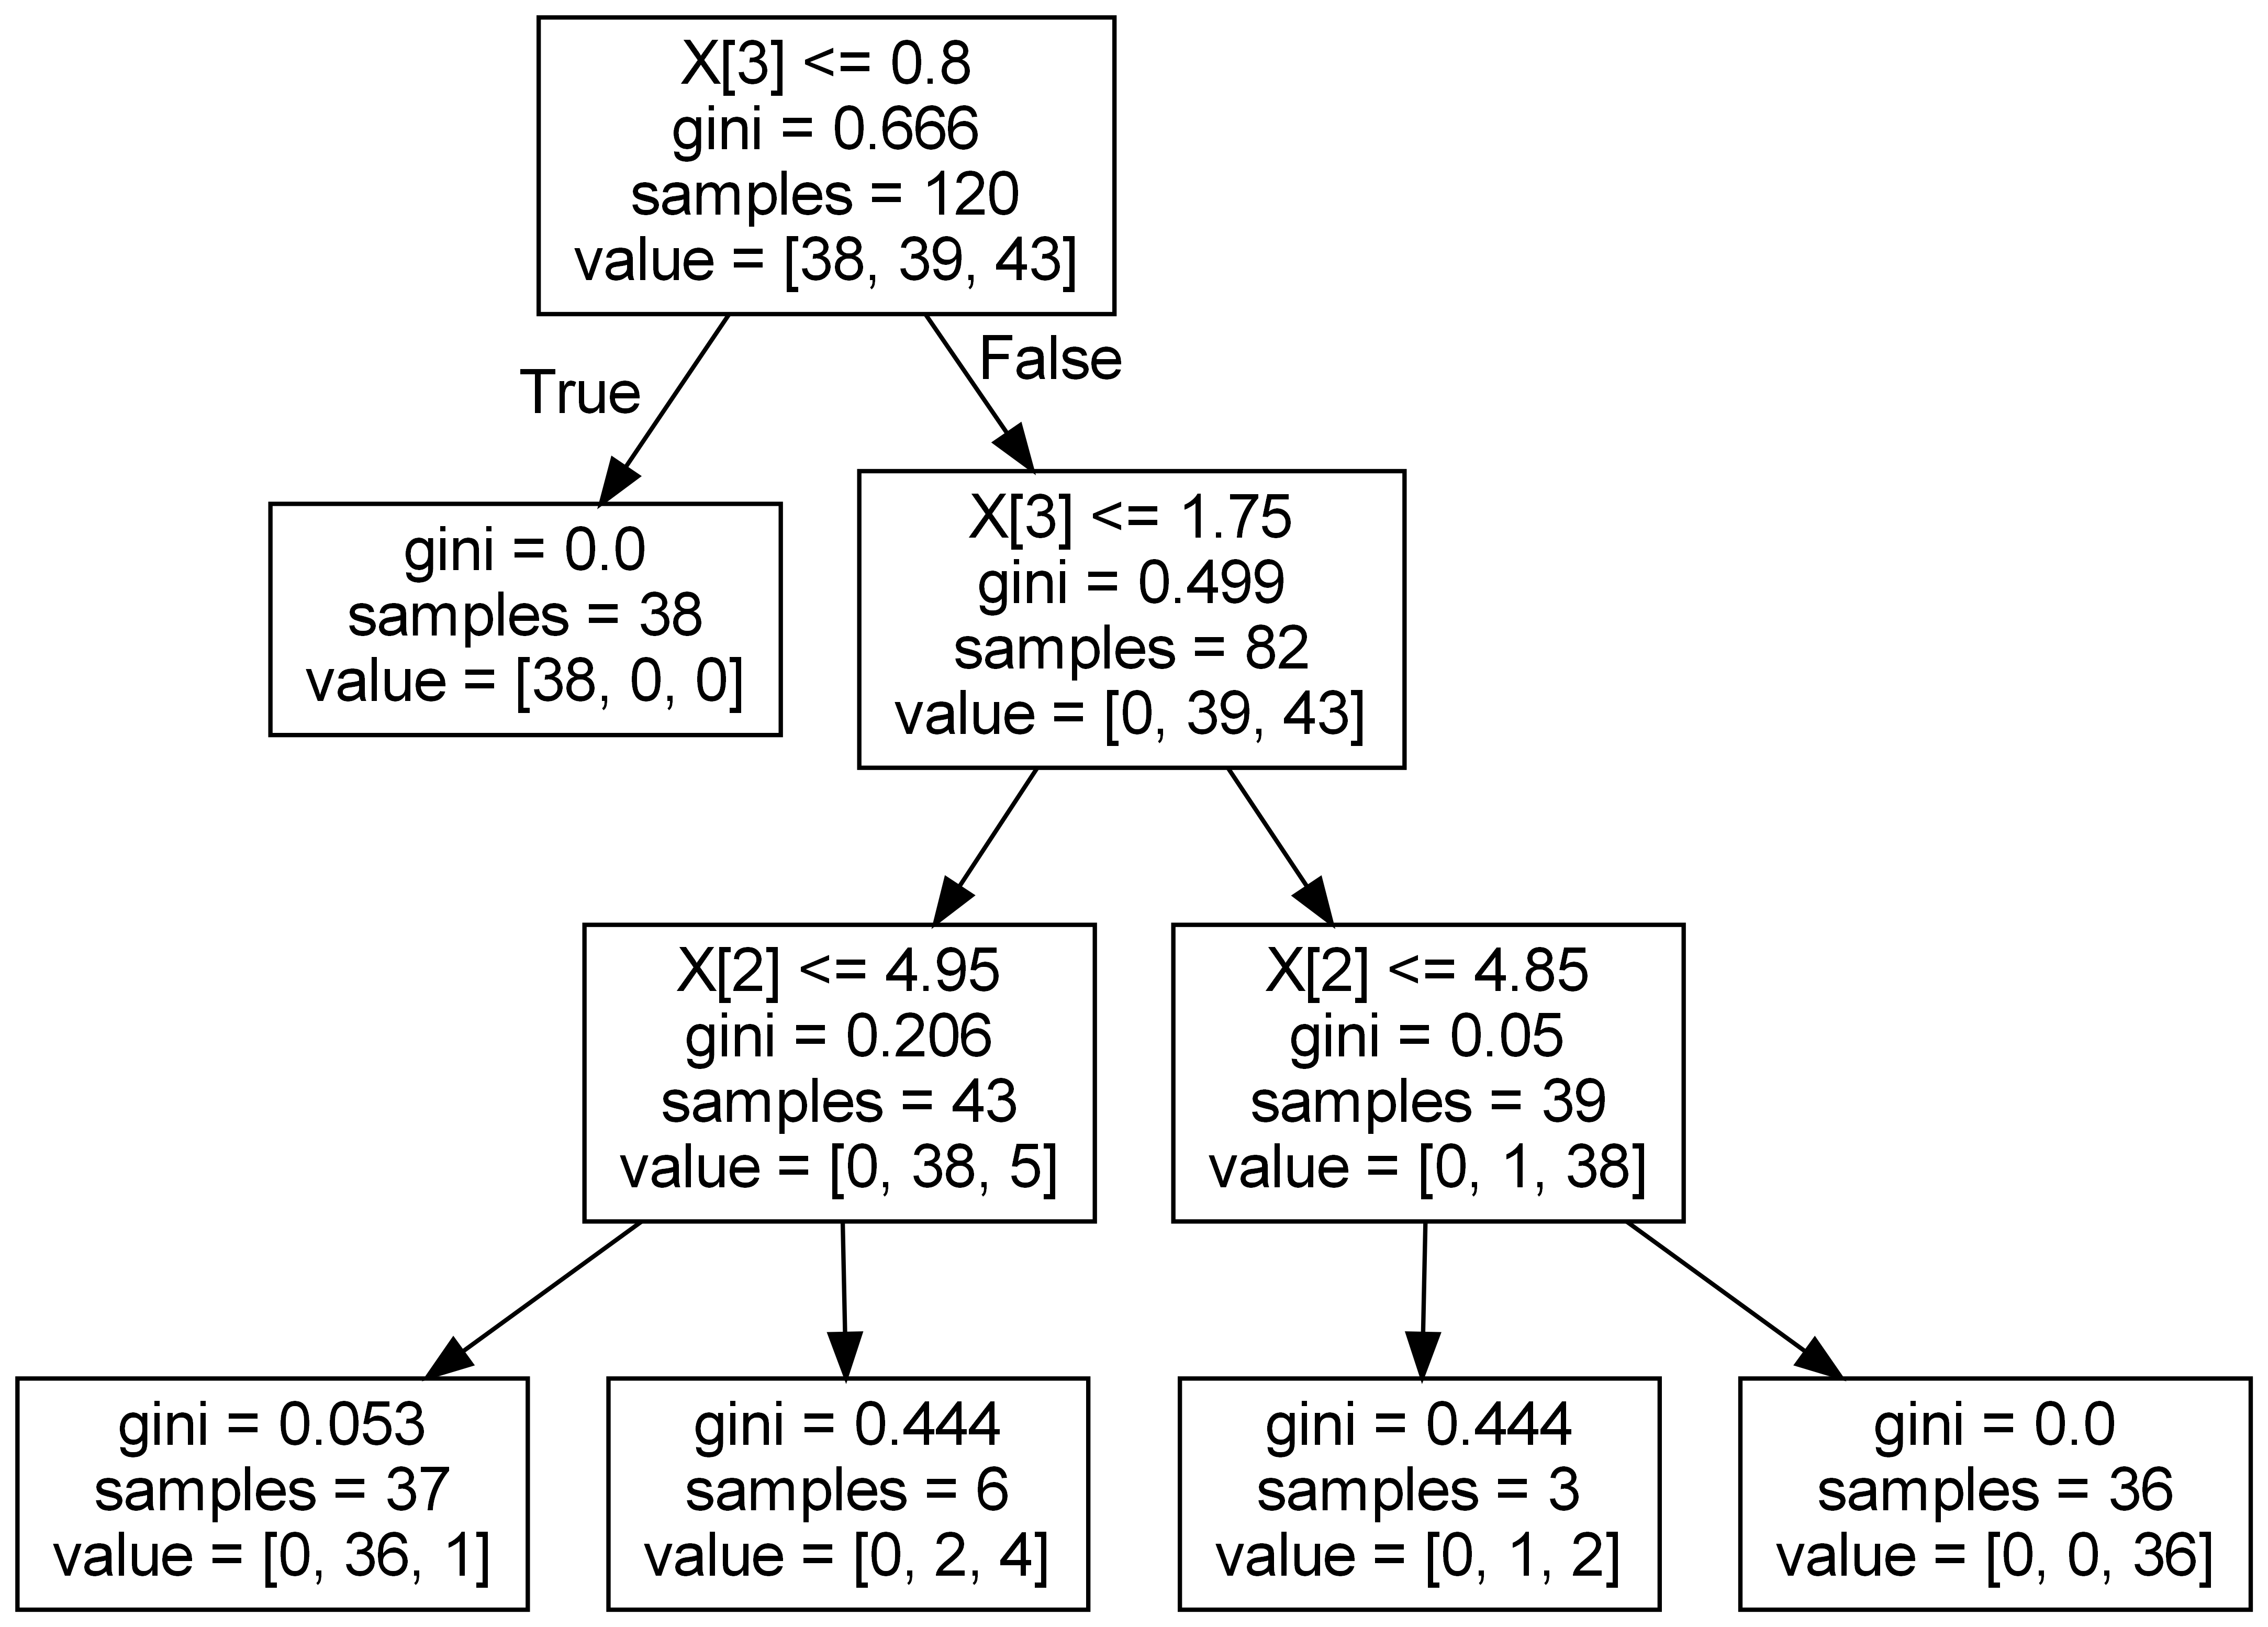

In [23]:
#   이미지 출력

from IPython.display import Image
Image(filename='decision-tree.png')

In [24]:
from sklearn.ensemble import RandomForestClassifier
#  Tree를 여러개 만드는 패키지 -> Ensamble 
#  만약에 Tree Dicision의 결과가 별로라면 Forest로 만들어서 결과를 다시 보는게 좋다.

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('랜덤 포레스트 정확도: {:.2f}'.format(accuracy_score(y_test,y_pred)*100))

랜덤 포레스트 정확도: 100.00


In [26]:
#   Abalone 데이터  활용

import  os
from os.path import  join

abalone_path = join('../08_ScikitLearning/99_src/','abalone.txt')
column_path = join('../08_ScikitLearning/99_src/','abalone_attributes.txt')
#   os-join으로 경로와 파일을 하나로 묶어줌.

abalone_columns = list()
for l in open(column_path):
    abalone_columns.append(l.strip())
#   dat를 for문으로 list type화

FileNotFoundError: [Errno 2] No such file or directory: '../08_ScikitLearning/99_src/abalone_attributes.txt'

In [ ]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)

data = data[data['Sex'] !='I']
#   원래 Sex에 I가 있었는데, I는 빼고 주세요!
label = data['Sex'].map(lambda x: 0 if x=='M' else 1)
#    lambda 의 기본 값은 M이면 0 아니면 1
del data['Sex']
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [ ]:
#   데이터 쪼개기

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

In [ ]:
#  모델에 Train data 입력

rf =RandomForestClassifier(max_depth=5)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


In [ ]:
#   List-up을 바로 하는 것 보다 정확도 판단이 먼저! 

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
#   sklearn.metric는 정확도를 알 수 있는 모델이 많은 패키지


In [ ]:
print ('Accurancy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print ('Precision: {:.2f}'.format(precision_score(y_test,y_pred)))
print ('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))
print ('AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)))

Accurancy: 0.54
Precision: 0.56
Recall: 0.24
AUC: 0.53


In [ ]:
# For문으로 Depth를 바꿔서 결과를 비교하기

best_model_depth = 0
best_model_accuracy = 0

for i in [2,3,4,5,6,7,8,9,10]:
  rf = RandomForestClassifier(max_depth=i)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  print('Accuracy: i={} {:.2f}'.format(i, acc * 100))

  if best_model_accuracy < acc:
    best_model_depth = i
    best_model_accuracy = acc

print('-------------------------------')
print('best_model_depth={0}, best_model_accracy={1}'.format(
    best_model_depth, best_model_accuracy))

Accuracy: i=2 52.20
Accuracy: i=3 51.15
Accuracy: i=4 51.50
Accuracy: i=5 53.62
Accuracy: i=6 53.44
Accuracy: i=7 54.50
Accuracy: i=8 53.09
Accuracy: i=9 54.14
Accuracy: i=10 55.03
-------------------------------
best_model_depth=10, best_model_accracy=0.5502645502645502
